# Super Resolution   

Image Classification CNN:

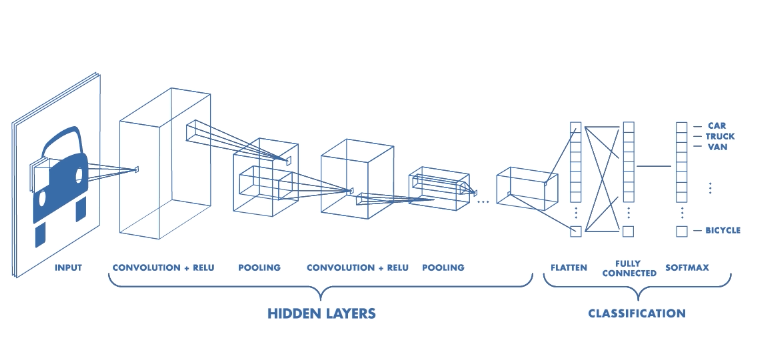

In [ ]:
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#reduces the spatial dimensions  (W ,L)
model.add(layers.MaxPooling2D((2, 2)))

![image.png](https://i.sstatic.net/amgCk.gif)

[Traditional Edge detection](https://blog.roboflow.com/edge-detection/)

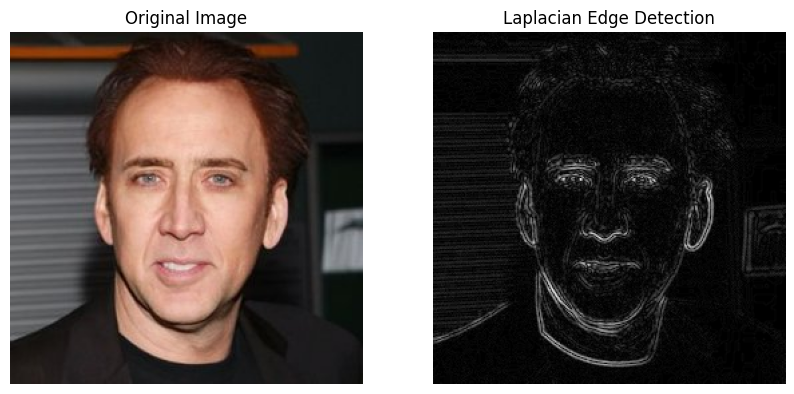

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/nickH.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Apply the Laplacian operator
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert the result to 8-bit (0-255) range
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Display the result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Laplacian edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

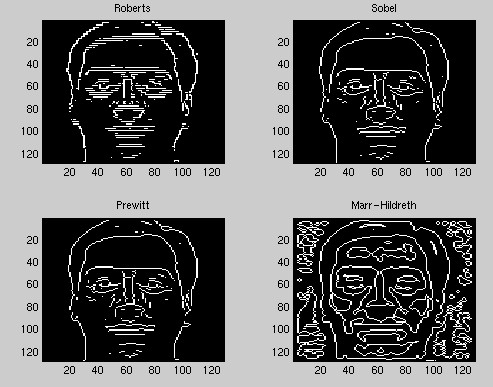

In [ ]:


# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the layers and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Traditional methods

1. [Nearest Neighbor Interpolation](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation)
Description: Assigns the value of the nearest pixel to the new pixel.

    Advantages: Simple and fast.

    Disadvantages: Produces blocky images with jagged edges.

2. [Bilinear Interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation)

  Description: Calculates the new pixel value by taking a weighted average of the
  four nearest pixels.

    Advantages: Smooths images better than nearest neighbor.

    Disadvantages: Can produce blurry images.

3.  [Bicubic Interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
  Description: Uses 16 nearest pixels to compute the new pixel value with cubic polynomials.

    Advantages: Provides smoother results than bilinear interpolation.

    Disadvantages: More computationally intensive; may still result in some blurring.


Super resolution

# First Conv layer (128  filters -> 3 by 3 kernel )
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(none, none, 3)))
    model.add(layers.BatchNormalization())

[Introduction to Batch Normalization](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/)


[Google Batch Norm](https://arxiv.org/abs/1502.03167)  vs [MIT Batch Norm](https://arxiv.org/abs/1805.11604)


Things both papers agree on


*   Batch normalization helps prevent overfitting and speeds up training of deep neural networks
*   It normalizes activations of each layer by subtracting mean and dividing by standard deviation


* Rescaling and offsetting is done using learnable parameters gamma and beta
*   Batch normalization handles internal covariate shift and smoothens the loss landscape









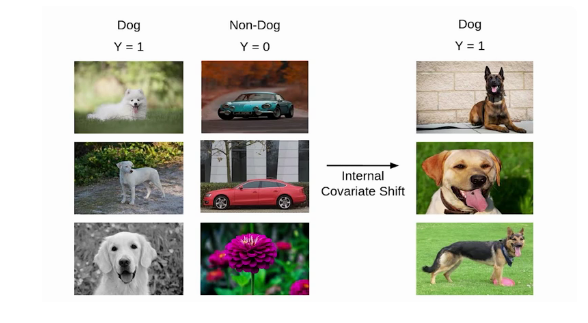

    # Second Conv layer (256 filters)
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

[sampling layer](https://machinelearningmastery.com/upsampling-and-transpose-convolution-layers-for-generative-adversarial-networks/)

    # Upsampling layer to upscale the 16x16 image to 32x32
    model.add(layers.UpSampling2D((2, 2)))

In [ ]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
# define input data
X = asarray([[1, 2],
			 [3, 4]])
# show input data for context
print(X)
# reshape input data into one sample a sample with a channel
X = X.reshape((1, 2, 2, 1))
# define model
model = Sequential()
model.add(UpSampling2D(input_shape=(2, 2, 1)))
#model.add(UpSampling2D(input_shape=(2, 2, 1),interpolation='bilinear'))
# summarize the model
model.summary()
# make a prediction with the model
yhat = model.predict(X)
# reshape output to remove channel to make printing easier
yhat = yhat.reshape((4, 4))
# summarize output
print(yhat)

[[1 2]
 [3 4]]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d_2 (UpSampling2D)       │ (None, 4, 4, 1)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import ssl

# Cancels out the SSL requirement for data download
ssl._create_default_https_context = ssl._create_unverified_context

(x_train_highres, _), (x_test_highres, _) = cifar100.load_data()

# Normalize pixels to [0, 1]
x_train_highres = x_train_highres.astype('float32') / 255.0
x_test_highres = x_test_highres.astype('float32') / 255.0

# Down scale the 16 by 16 from 32 32
x_train_lowres = tf.image.resize(x_train_highres, (16, 16)).numpy()
x_test_lowres = tf.image.resize(x_test_highres, (16, 16)).numpy()

def upscalingV2():
    model = models.Sequential()

    # First Conv layer (128  filters -> 3 by 3 kernal )
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(16, 16, 3)))
    model.add(layers.BatchNormalization())

    # Second Conv layer (256 filters)
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

    # Upsampling layer to upscale the 16x16 image to 32x32
    model.add(layers.UpSampling2D((2, 2)))

    # Refines the upscaled image.
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
      # 0 1 input 0 1 output
    model.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return model

upscalingmodelV2 = upscalingV2()

upscalingmodelV2.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

upscalingmodelV2.summary()

checkpoint = ModelCheckpoint('eds_upscaler_model.keras', save_best_only=True)

#input low res images and create an image then compare to high res image cal loss and adjust
with tf.device('/GPU:0'):
    history = upscalingmodelV2.fit(x_train_lowres, x_train_highres, epochs=50, batch_size=64,
                                   validation_data=(x_test_lowres, x_test_highres),
                                   callbacks=[checkpoint])

print("Training History:")
print(history.history)

test_loss = upscalingmodelV2.evaluate(x_test_lowres, x_test_highres)
print(f"\nTest Loss: {test_loss}")

upscalingmodelV2.save('eds_upscaler_modelV3.keras')


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, None, None, 64)      │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, None, None, 128)     │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, None, None, 64)      │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, None, None, 64)      │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, None, None, 3)       │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,195 (594.51 KB)

 Trainable params: 151,683 (592.51 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 0.0035 - val_loss: 3.0076e-04
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - loss: 8.0428e-04 - val_loss: 9.7923e-04
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 5.0668e-04 - val_loss: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 5.2183e-04 - val_loss: 3.0525e-04
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 3.6871e-04 - val_loss: 3.6199e-04
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 3.1272e-04 - val_loss: 2.9432e-04
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 2.7601e-04 - val_loss: 3.2913e-04
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 2.3936e-04 - val_loss: 5.2192e-04
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 2.4002e-04 - val_loss: 6.3120e-04
Training History:
{'loss': [0.00182

Results of a model trained in smaller amount of time same input shape

What are some very note worthy things?

-  blurry?
-  Hue?
-  Anything else?





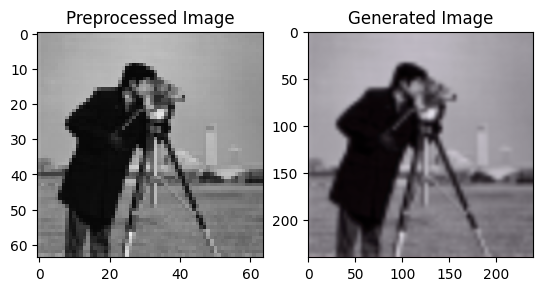

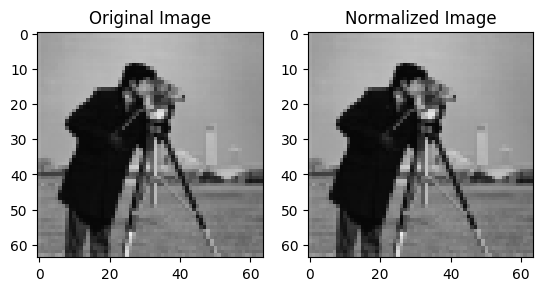

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


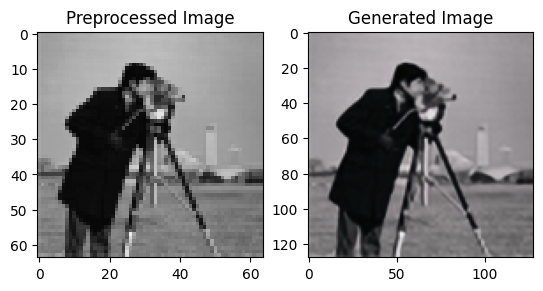

In [ ]:

#using actual model weights trained above
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model


imagepath = "/content/lowres2.png"
image = cv2.imread(imagepath)

size = (64, 64)
resizedImage = cv2.resize(image, size)


if len(resizedImage.shape) == 2:
    resizedImage = cv2.cvtColor(resizedImage, cv2.COLOR_GRAY2RGB)

normalizedImage = resizedImage.astype('float32') / 255.0

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Normalized Image")
plt.imshow(normalizedImage)
plt.show()

preprocessedImage=normalizedImage
preprocessedImage = cv2.cvtColor(preprocessedImage, cv2.COLOR_BGR2RGB)

upscalingModelPath = "/content/eds_upscaler_modelV3.keras"
upscalingModel = load_model(upscalingModelPath)


inputImage = tf.expand_dims(preprocessedImage, axis=0)

generatedimage = upscalingModel.predict(inputImage)

plt.subplot(1, 2, 1)
plt.title("Preprocessed Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Generated Image")
plt.imshow(generatedimage[0])
plt.show()

# In Conclusion

Our model

* First Layer: Detects basic features like edges.
  * Normalization: Batch normalization helps in smoother and faster training.
* Second Layer: Learns more complex features with more filters.
*Upsampling: Doubles the image size from 16x16 to 32x32 using nearest neighbor interpolation.
* Post-Upsampling Convolution: Refines the upscaled image.




Other models to consider

[Enhanced Deep Super-Resolution](https://arxiv.org/abs/1707.02921)

- actually removes batchNorm
- way more intensive

[Residual Channel Attention Networks](https://arxiv.org/abs/1807.02758)


- focus on the most important features in an image
- computational complexity and memory usage.


[U-Net](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)

- it captures both global context and precise localization
- quite memory-intensive especially with high-resolution images.

[SRGAN](https://arxiv.org/abs/1609.04802)

- It doesn't just upscale images—it generates new details
- It often requires careful tuning and significant computational resources to avoid issues like artifacts or mode collapse.

Extra model and Train using Conv2DTranspose (Allows for kernel to "learn")

"[Transposed](https://www.geeksforgeeks.org/what-is-transposed-convolutional-layer/)" - Instead of sliding the kernel over the input and performing element-wise multiplication and summation, a transposed convolutional layer slides the input over the kernel and performs element-wise multiplication and summation. This results in an output that is larger than the input, and the size of the output can be controlled by the stride and padding parameters of the layer


-  [example](https://towardsdatascience.com/understand-transposed-convolutions-and-build-your-own-transposed-convolution-layer-from-scratch-4f5d97b2967)
- [paper](https://www.matthewzeiler.com/mattzeiler/deconvolutionalnetworks.pdf)

In [ ]:
import os
import ssl
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt



ssl._create_default_https_context = ssl._create_unverified_context

(x_train_highres, _), (x_test_highres, _) = cifar100.load_data()
x_train_highres = x_train_highres.astype('float32') / 255.0
x_test_highres = x_test_highres.astype('float32') / 255.0
x_train_lowres = tf.image.resize(x_train_highres, (16, 16)).numpy()
x_test_lowres = tf.image.resize(x_test_highres, (16, 16)).numpy()

def upscalingV2():
    model = models.Sequential()
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(16, 16, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
    return model

# chat help me set this up makes sure to use 2 gpus while training : -->  MirroredStrategy
#you cant run this here only in kaggle change run time to 2 gpus
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

with strategy.scope():
    upscalingmodelV2 = upscalingV2()
    upscalingmodelV2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

upscalingmodelV2.summary()

checkpoint = ModelCheckpoint('eds_upscaler_model.keras', save_best_only=True)

batch_size = 64 * strategy.num_replicas_in_sync

history = upscalingmodelV2.fit(
    x_train_lowres, x_train_highres,
    epochs=50,
    batch_size=batch_size,
    validation_data=(x_test_lowres, x_test_highres),
    callbacks=[checkpoint]
)

test_loss = upscalingmodelV2.evaluate(x_test_lowres, x_test_highres)
print(f"\nTest Loss: {test_loss}")

upscalingmodelV2.save('eds_upscaler_modelV4.keras')


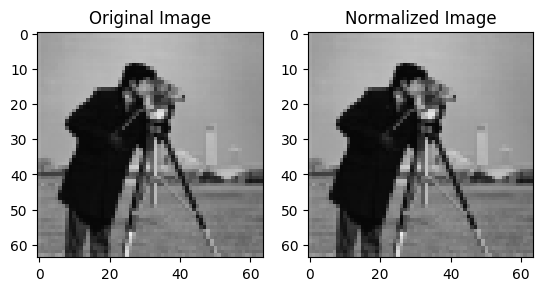

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


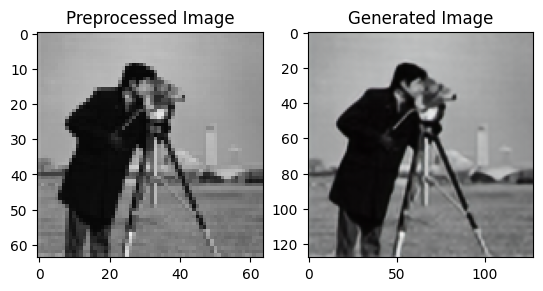

In [ ]:
#way better results from this model given more trainng and more filters with a learning kernel
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model


imagepath = "/content/lowres2.png"
image = cv2.imread(imagepath)

size = (64, 64)
resizedImage = cv2.resize(image, size)

if len(resizedImage.shape) == 2:
    resizedImage = cv2.cvtColor(resizedImage, cv2.COLOR_GRAY2RGB)

normalizedImage = resizedImage.astype('float32') / 255.0

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Normalized Image")
plt.imshow(normalizedImage)
plt.show()

preprocessedImage=normalizedImage
preprocessedImage = cv2.cvtColor(preprocessedImage, cv2.COLOR_BGR2RGB)

upscalingModelPath = "/content/eds_upscaler_modelV4.keras"
upscalingModel = load_model(upscalingModelPath)

inputImage = tf.expand_dims(preprocessedImage, axis=0)


# make sure that the dims match what input shape that model expects
inputImage = tf.expand_dims(preprocessedImage, axis=0)

generatedimage = upscalingModel.predict(inputImage)

plt.subplot(1, 2, 1)
plt.title("Preprocessed Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Generated Image")
plt.imshow(generatedimage[0])
plt.show()